For the final project, you will conduct your own exploratory data analysis and create an RMD file that explores the variables, structure, patterns, oddities, and underlying relationships of a data set of your choice.

The analysis should be almost like a stream-of-consciousness as you ask questions, create visualizations, and explore your data.

This project is open-ended in that we are not looking for one right answer. As John Tukey stated, "The combination of some data and an aching desire for an answer does not ensure that a reasonable answer can be extracted from a given body of data." We want you to ask interesting questions about data and give you a chance to explore. We will provide some options of data sets to explore; however, you may choose to explore an entirely different data set. You should be aware that finding your own data set and cleaning that data set into a form that can be read into R can take considerable time and effort. This can add as much as a day, a week, or even months to your project so only adventure to find and clean a data set if you are truly prepared with programming and data wrangling skills.

Data set downloaded from https://docs.google.com/document/d/1qEcwltBMlRYZT-l699-71TzInWfk4W9q5rTCSvDVMpc/pub?embedded=true

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.

During this exploration I am interested in the factors that could lead to loan being defaulted by the user. So my exploration would be centered about that. The question I am interested is "What factors affect loan being defaulted?"

In [1]:
library(ggplot2)

Let's load the data. I will do some processing here to 

* select only the columns in which I am interested in
* change the format of data for my analysis
* change column names

In [2]:
setwd("/home/aseem/projects/website/udacity_data_science_notes/Data_Analysis_with_R")

In [3]:
loanData <- read.csv("prosperLoanData.csv")
loanData$ListingCreationDate <- as.Date(loanData$ListingCreationDate, "%Y-%m-%d")
loanData$ClosedDate <- as.Date(loanData$ClosedDate, "%Y-%m-%d")
loanData$EmploymentStatusDurationYear <- floor(loanData$EmploymentStatusDuration / 12)

relevantLoanData <- loanData[, c(
  "ListingNumber", 
  "ListingCreationDate", 
  "CreditGrade", 
  "Term", 
  "LoanStatus",
  "ClosedDate",
  "ListingCategory..numeric.",
  "Occupation",
  "EmploymentStatus",
  "EmploymentStatusDurationYear",
  "LoanOriginalAmount"
  )]

colnames(relevantLoanData)[colnames(relevantLoanData) == "ListingCategory..numeric."] <- "ListingCategory"

# Univariate Plots Section

Will look at the various variables to get an general understanding about the data.

Let's find out the number of rows that the data has and some other characteristics of the data.

In [6]:
nrow(relevantLoanData)

[1] 113937

In [7]:
names(relevantLoanData)

[1] "ListingNumber"                "ListingCreationDate"         
 [3] "CreditGrade"                  "Term"                        
 [5] "LoanStatus"                   "ClosedDate"                  
 [7] "ListingCategory"              "Occupation"                  
 [9] "EmploymentStatus"             "EmploymentStatusDurationYear"
[11] "LoanOriginalAmount"

In [8]:
str(relevantLoanData)

'data.frame':	113937 obs. of  11 variables:
 $ ListingNumber               : int  193129 1209647 81716 658116 909464 1074836 750899 768193 1023355 1023355 ...
 $ ListingCreationDate         : Date, format: "2007-08-26" "2014-02-27" ...
 $ CreditGrade                 : Factor w/ 9 levels "","A","AA","B",..: 5 1 8 1 1 1 1 1 1 1 ...
 $ Term                        : int  36 36 36 36 36 60 36 36 36 36 ...
 $ LoanStatus                  : Factor w/ 12 levels "Cancelled","Chargedoff",..: 3 4 3 4 4 4 4 4 4 4 ...
 $ ClosedDate                  : Date, format: "2009-08-14" NA ...
 $ ListingCategory             : int  0 2 0 16 2 1 1 2 7 7 ...
 $ Occupation                  : Factor w/ 68 levels "","Accountant/CPA",..: 37 43 37 52 21 43 50 29 24 24 ...
 $ EmploymentStatus            : Factor w/ 9 levels "","Employed",..: 9 2 4 2 2 2 2 2 2 2 ...
 $ EmploymentStatusDurationYear: num  0 3 NA 9 3 6 14 8 22 22 ...
 $ LoanOriginalAmount          : int  9425 10000 3001 10000 15000 15000 3000 10000 10000 

In [9]:
summary(relevantLoanData)

 ListingNumber     ListingCreationDate   CreditGrade         Term      
 Min.   :      4   Min.   :2005-11-09          :84984   Min.   :12.00  
 1st Qu.: 400919   1st Qu.:2008-09-19   C      : 5649   1st Qu.:36.00  
 Median : 600554   Median :2012-06-16   D      : 5153   Median :36.00  
 Mean   : 627886   Mean   :2011-07-08   B      : 4389   Mean   :40.83  
 3rd Qu.: 892634   3rd Qu.:2013-09-09   AA     : 3509   3rd Qu.:36.00  
 Max.   :1255725   Max.   :2014-03-10   HR     : 3508   Max.   :60.00  
                                        (Other): 6745                  
                 LoanStatus      ClosedDate         ListingCategory 
 Current              :56576   Min.   :2005-11-25   Min.   : 0.000  
 Completed            :38074   1st Qu.:2009-07-14   1st Qu.: 1.000  
 Chargedoff           :11992   Median :2011-04-05   Median : 1.000  
 Defaulted            : 5018   Mean   :2011-03-07   Mean   : 2.774  
 Past Due (1-15 days) :  806   3rd Qu.:2013-01-30   3rd Qu.: 3.000  
 Past Due 

Let's find out year wise distribution of loan creation.

In [11]:
relevantLoanData$ListingCreationYear <- as.numeric(format(relevantLoanData$ListingCreationDate, "%Y"))

table(relevantLoanData$ListingCreationYear)


 2005  2006  2007  2008  2009  2010  2011  2012  2013  2014 
   23  6213 11557 11263  2206  5530 11442 19556 35413 10734 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


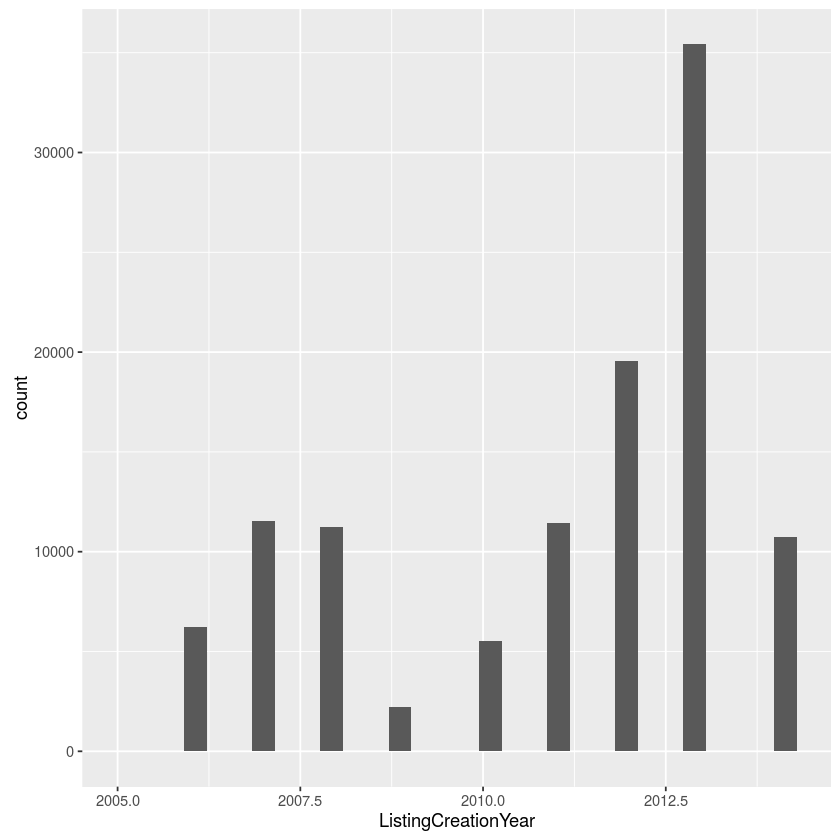

In [12]:
qplot(data = relevantLoanData, x = ListingCreationYear)

What about credit grade for the years before 2009?

In [15]:
dataBefore2009 <- relevantLoanData[relevantLoanData$ListingCreationYear < 2009,]
table(dataBefore2009$CreditGrade)


        A   AA    B    C    D    E   HR   NC 
 116 3313 3508 4386 5644 5151 3289 3508  141 

The credit grade is not present for all the cases even before 2009. Let's see for which years it is missing so I remember that for future analysis.

In [16]:
table(dataBefore2009[dataBefore2009$CreditGrade == "",]$ListingCreationYear)


2007 2008 
  13  103 

What is the the distribution of the loans by term? 


   12    36    60 
 1614 87778 24545 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


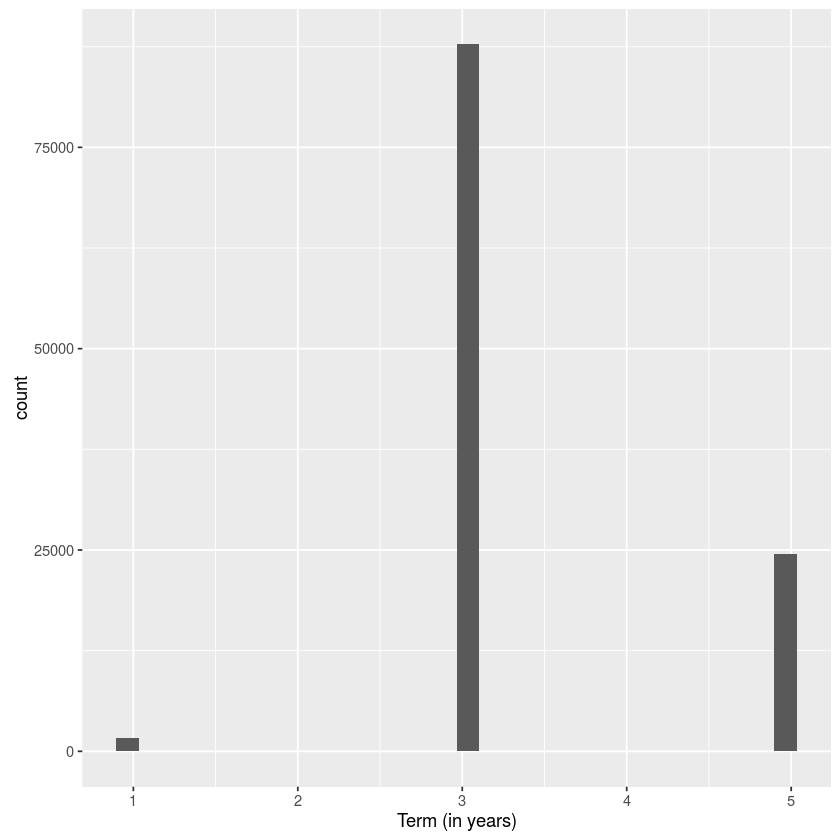

In [17]:
table(relevantLoanData$Term)
qplot(data = relevantLoanData, x = Term/12, xlab = "Term (in years)")

What about the loan status?

In [18]:
table(relevantLoanData$LoanStatus)


             Cancelled             Chargedoff              Completed 
                     5                  11992                  38074 
               Current              Defaulted FinalPaymentInProgress 
                 56576                   5018                    205 
  Past Due (1-15 days)   Past Due (>120 days)  Past Due (16-30 days) 
                   806                     16                    265 
 Past Due (31-60 days)  Past Due (61-90 days) Past Due (91-120 days) 
                   363                    313                    304 

When was the loan closed?


 2005  2006  2007  2008  2009  2010  2011  2012  2013  2014 
    8   391  3355  5718  8197  7606  7471  7719 11873  2751 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 58848 rows containing non-finite values (stat_bin).”

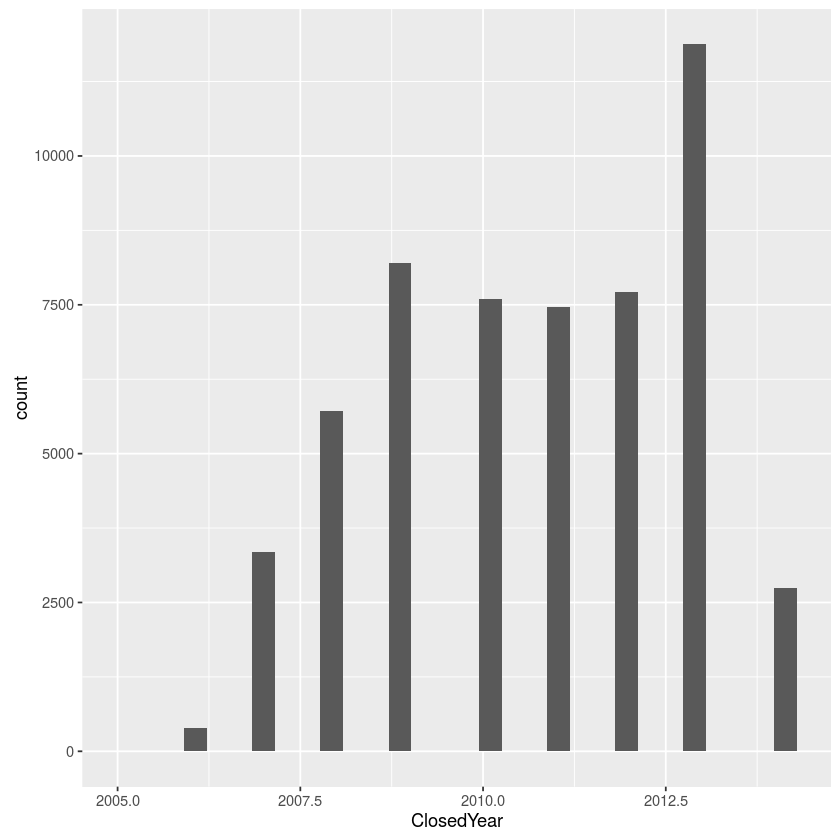

In [19]:
relevantLoanData$ClosedYear <- as.numeric(format(relevantLoanData$ClosedDate, "%Y"))

table(relevantLoanData$ClosedYear)
qplot(data = relevantLoanData, x = ClosedYear)

In which categories is the loan distributed?

In [20]:
table(relevantLoanData$ListingCategory)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
16965 58308  7433  7189  2395   756  2572 10494   199    85    91   217    59 
   13    14    15    16    17    18    19    20 
 1996   876  1522   304    52   885   768   771 

What is  occupation of the person?

In [21]:
table(relevantLoanData$Occupation)


                                                       Accountant/CPA 
                              3588                               3233 
          Administrative Assistant                            Analyst 
                              3688                               3602 
                         Architect                           Attorney 
                               213                               1046 
                         Biologist                         Bus Driver 
                               125                                316 
                        Car Dealer                            Chemist 
                               180                                145 
                     Civil Service                             Clergy 
                              1457                                196 
                          Clerical                Computer Programmer 
                              3164                               4478 
     

What is employment status of the person?

In [23]:
sort(table(relevantLoanData$EmploymentStatus), decreasing = TRUE)


     Employed     Full-time Self-employed Not available         Other 
        67322         26355          6134          5347          3806 
                  Part-time  Not employed       Retired 
         2255          1088           835           795 

Employed for how long?

In [24]:
sort(table(relevantLoanData$EmploymentStatusDurationYear), decreasing = TRUE)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
13721 11037  9373  8015  6882  6544  6083  5056  4397  3834  3395  2975  2964 
   13    14    15    16    17    18    19    20    22    21    24    23    25 
 2693  2277  1963  1675  1392  1339  1086   964   940   891   844   840   722 
   26    27    28    29    30    32    33    31    34    35    36    37    38 
  603   554   467   393   359   284   283   273   219   190   131   119    91 
   39    40    42    41    43    44    45    46    47    48    51    53    49 
   88    76    54    53    41    28    24    17    12    10     7     7     6 
   52    54    50    56    57    61    62    55    60 
    6     3     2     2     2     2     2     1     1 

Loan amount distribution?

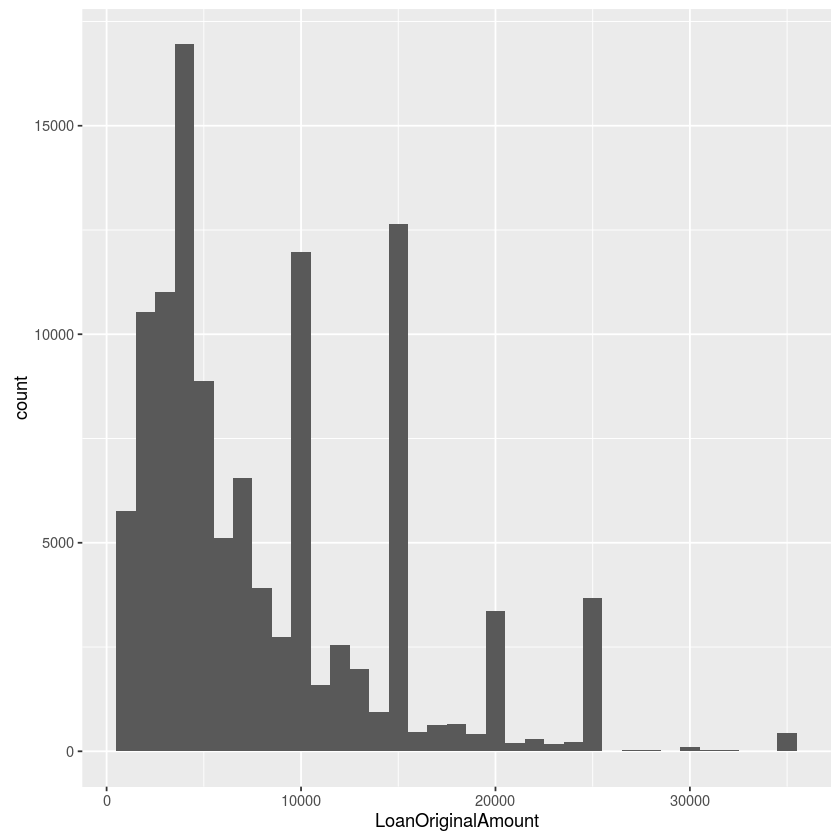

In [25]:
qplot(data = relevantLoanData, x = LoanOriginalAmount, binwidth=1000)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


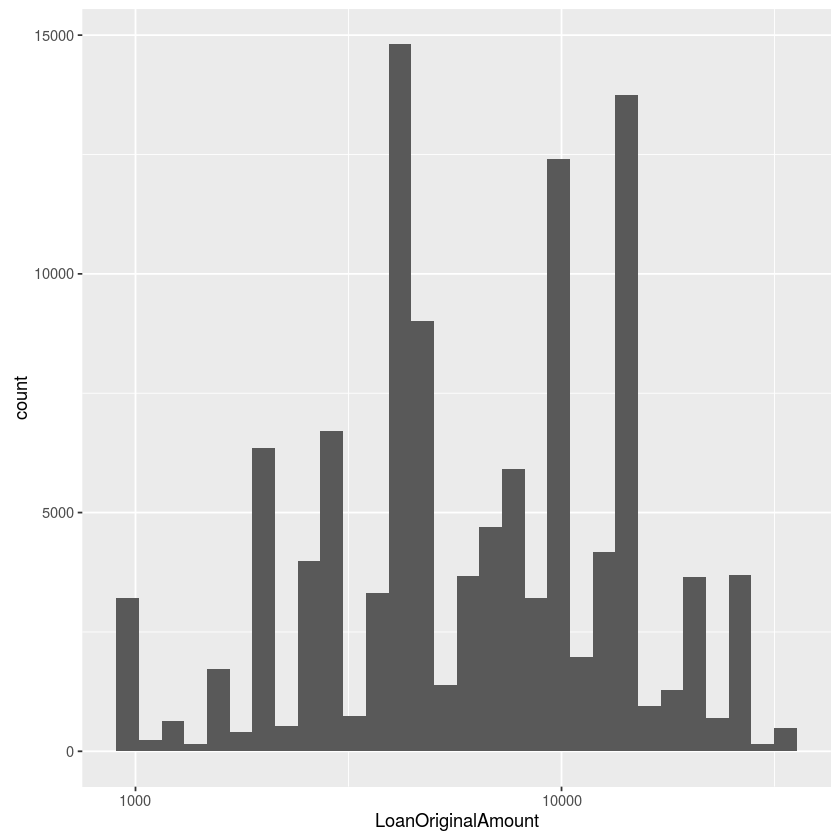

In [26]:
ggplot(relevantLoanData, aes(x = LoanOriginalAmount)) + 
  geom_histogram() +
  scale_x_log10()

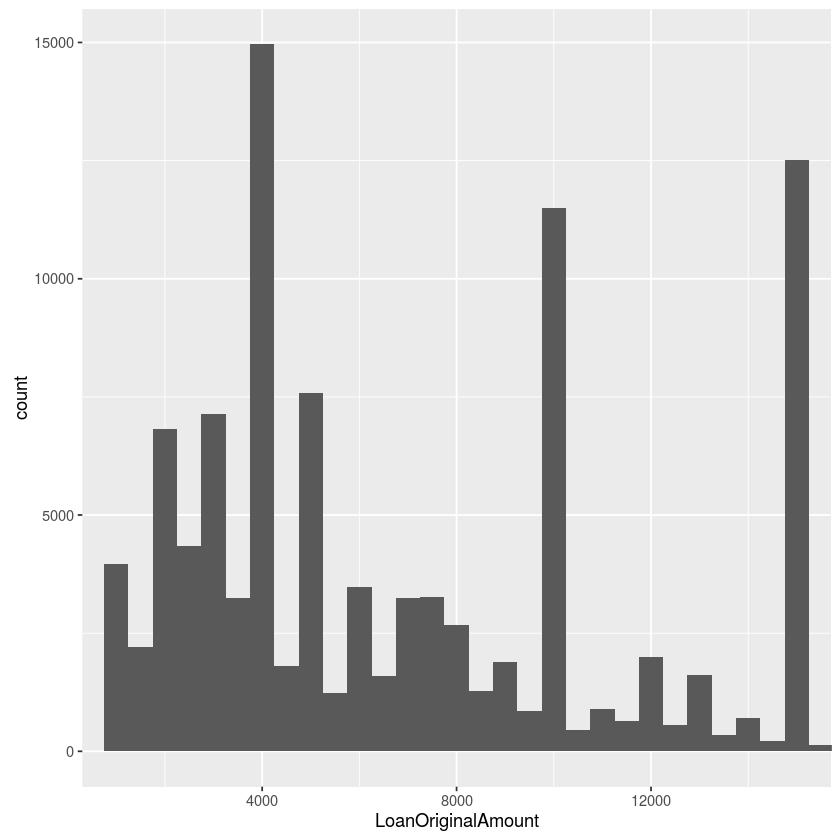

In [27]:
ggplot(relevantLoanData, aes(x = LoanOriginalAmount)) + 
  geom_histogram(binwidth = 500) +
  coord_cartesian(xlim = c(1000, 15000))

Looking at the graph does not give much intuition except that there are some amount in which loans have been disbused more. 

In [28]:
head(sort(table(relevantLoanData$LoanOriginalAmount), decreasing = TRUE), n = 10)


 4000 15000 10000  5000  2000  3000 25000 20000  1000  2500 
14333 12407 11106  6990  6067  5749  3630  3291  3206  2992 

Looking at the exact numbers shows the most popular choices in which loan has been disbursed.